## 线性回归     

线性回归是机器学习入门知识，应用十分广泛。线性回归利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的，其表达形式为$y = wx+b+e$，$e$为误差服从均值为0的正态分布。        

首先让我们来确认线性回归的损失函数：
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
然后利用随机梯度下降法更新参数$\textbf{w}$和$\textbf{b}$来最小化损失函数，最终学得$\textbf{w}$和$\textbf{b}$的数值

In [0]:
import torch as t
import matplotlib.pyplot as plt
from IPython import display

device = t.device('cuda:0')

In [0]:
t.manual_seed(1000)

''' y = 2 * x + 3'''
def gen_fake_data(batch_size=8):
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1, device=device)
    return x, y

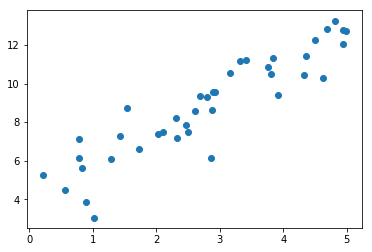

In [27]:
x, y = gen_fake_data(batch_size=40)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

In [28]:
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)
lr = 0.02
w, b

(tensor([[0.3189]], device='cuda:0'), tensor([[0.]], device='cuda:0'))

In [29]:
for i in range(1000):
    x, y = gen_fake_data(batch_size=8)
    
    # forward
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.mean()
    
    # backward：链式法则 
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    w.sub(lr * dw)
    b.sub(lr * db)
    
    if i%50 ==0:
       
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = gen_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())

RuntimeError: ignored

In [0]:
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

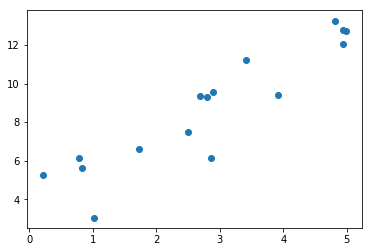

In [31]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

In [32]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等价于x.mm(w);for python3 only
    loss = 0.5 * (y_pred - y) ** 2 # 均方误差
    loss = loss.mean()
    
    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())

RuntimeError: ignored

In [0]:
import numpy as np

# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((w_current * x) + b_current))
        w_gradient += -(2/N) * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = w_current - (learningRate * w_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [35]:
def run():
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}"
          .format(initial_b, initial_m,
                  compute_error_for_line_given_points(initial_b, initial_m, points))
          )
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".
          format(num_iterations, b, m,
                 compute_error_for_line_given_points(b, m, points))
          )

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10000 iterations b = 0.6078985997054931, m = 1.4675440436333027, error = 112.31533427075733
